In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Bangkit Capstone Team/Datasets/Train.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
len(os.listdir('/tmp/Train/'))

12

In [ ]:
datasets = '/tmp/Train'

# import library to be used
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Load the datasets

class_folders = os.listdir(datasets)
images = []
labels = []

for class_folders in class_folders:
  class_path = os.path.join(datasets, class_folders)
  image_files = os.listdir(class_path)  

  for y in image_files:
    image_path = os.path.join(class_path, y)
    image = cv2.imread(image_path)
    images.append(image)
    labels.append(class_folders)

images = np.array(images)
labels = np.array(labels)

<ipython-input-6-850bc72b0dd3>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


Exploratory Data Analysis (EDA)

Datasets shape (7350,)
7350


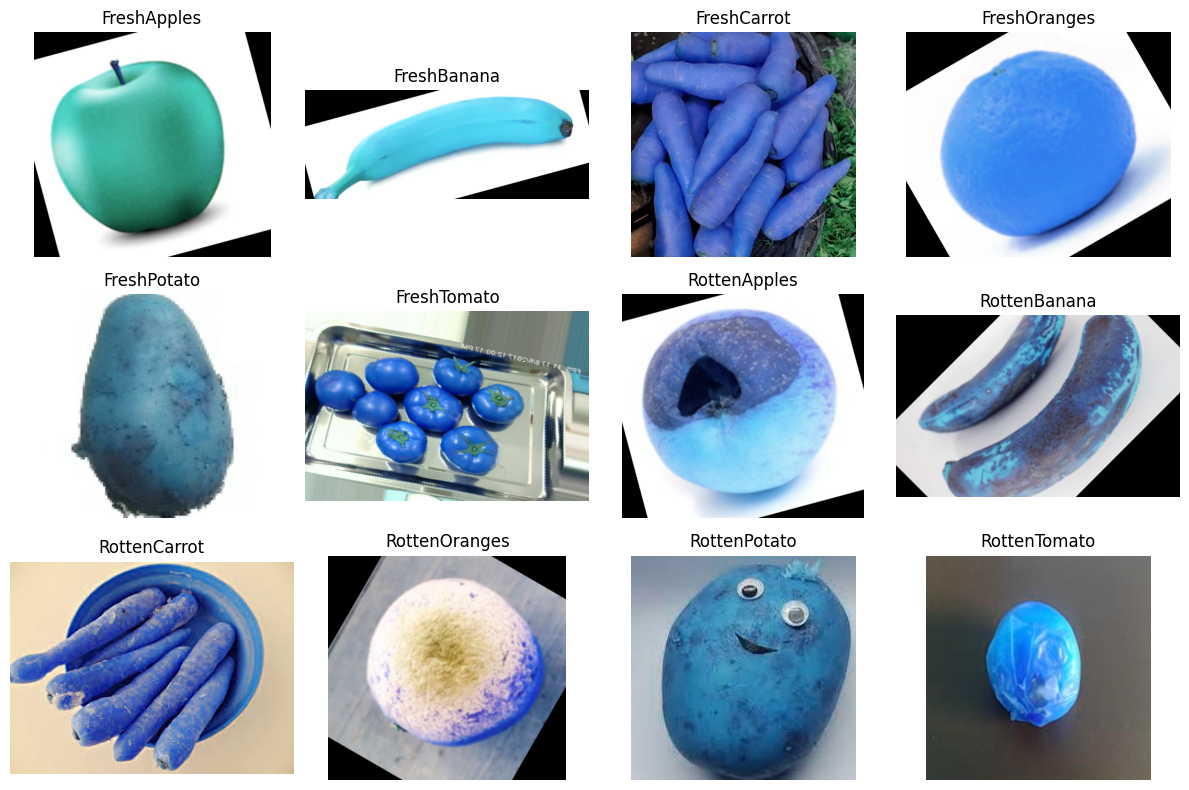

In [ ]:
print("Datasets shape", images.shape)

num_image = images.shape[0]
print(num_image)

# Sample image from each class
unique_labels = np.unique(labels)
fig, axs = plt.subplots(3, 4, figsize=(12, 8))

for i, label in enumerate(unique_labels):
    class_images = images[labels == label]
    ax = axs[i // 4, i % 4]
    ax.imshow(class_images[0])
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

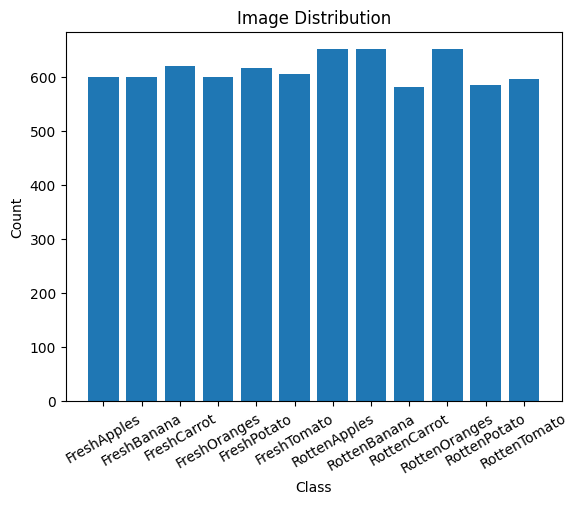

In [ ]:
# Image distribution visualization
class_counts = [np.sum(labels == label) for label in unique_labels]

plt.bar(unique_labels, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Image Distribution')
plt.xticks(rotation=30)
plt.show()


In [ ]:
# Image sizes
image_sizes = np.array([image.shape[:2] for image in images])
print("Image Sizes:\n", image_sizes)

# Color channels
num_channels = images.shape[3] if len(images.shape) == 4 else 1
print("Number of Color Channels:", num_channels)

# Pixel intensity distribution
gray_images = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY) if num_channels == 3 else images
plt.hist(gray_images.ravel(), bins=256)
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.title('Pixel Intensity Distribution')
plt.show()

Image Sizes:
 [[336 354]
 [354 338]
 [364 410]
 ...
 [288 474]
 [414 622]
 [422 474]]
Number of Color Channels: 1


KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7fe9587ee050> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fe9587ed2d0> (for post_execute):


KeyboardInterrupt: ignored

Convolutional Neural Network (CNN)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Resize images
resized_images = []
target_size = (224, 224)  # Adjust the target size as needed

for image in images:
    resized_image = tf.image.resize(image, target_size)
    resized_images.append(resized_image)

resized_images = np.array(resized_images)

# Normalize pixel values
normalized_images = resized_images / 255.0

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels, test_size=0.2, random_state=42)

NameError: ignored